In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from data_prep import get_fully_featured_df

In [127]:
df = get_fully_featured_df(True)

In [128]:
def remove_unwanted_columns(df):
    keep_columns = {'InternalNum_40810600', 'InternalNum_40861000', 'InternalNum_40860500', 'InternalNum_40810700'}

    columns_to_drop = [
        col for col in df.columns
        if col.startswith('InternalNum') and col not in keep_columns
    ]
    df = df.drop(columns=columns_to_drop)
    return df

In [129]:
light_df = remove_unwanted_columns(df)

In [130]:
light_df = light_df[(light_df['InternalNum_40810600'] == True) | (light_df['InternalNum_40861000'] == True) | (light_df['InternalNum_40860500'] == True) | (light_df['InternalNum_40810700'] == True)] 

In [131]:
light_df

,datetime,kWh,Latitude,Longitude,temperature_2m,dew_point_2m,rain,snowfall,snow_depth,weathercode,...,day_of_year_364,day_of_year_365,year_2021,year_2022,year_2023,year_2024,InternalNum_40810600,InternalNum_40810700,InternalNum_40860500,InternalNum_40861000
215802,2021-01-01 11:00:00,3.501618,50.419411,29.842060,7.774000,6.574000,4.429287,92.117561,100.0,16.981165,...,False,False,True,False,False,False,False,True,False,False
215803,2021-01-01 12:00:00,0.758382,50.419411,29.842060,8.474000,6.974000,4.748213,90.286583,100.0,20.240198,...,False,False,True,False,False,False,False,True,False,False
215804,2021-01-01 13:00:00,1.520000,50.419411,29.842060,8.074000,6.524000,4.951329,89.947289,100.0,15.379206,...,False,False,True,False,False,False,False,True,False,False
215805,2021-01-01 14:00:00,0.000000,50.419411,29.842060,6.974000,5.174000,3.702841,88.316093,100.0,14.336861,...,False,False,True,False,False,False,False,True,False,False
215806,2021-01-01 15:00:00,0.000000,50.419411,29.842060,5.924000,3.874000,1.981054,86.688454,100.0,17.114204,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535285,2024-10-31 03:00:00,0.000000,50.349030,30.955351,12.087001,9.987000,9.264519,86.992470,100.0,19.440834,...,False,False,False,False,False,True,False,False,False,True
1535286,2024-10-31 04:00:00,0.000000,50.349030,30.955351,12.087001,9.837001,9.159901,86.123260,100.0,19.866161,...,False,False,False,False,False,True,False,False,False,True
1535287,2024-10-31 05:00:00,0.000000,50.349030,30.955351,12.137000,9.837001,9.275449,85.840385,100.0,19.416653,...,False,False,False,False,False,True,False,False,False,True
1535288,2024-10-31 06:00:00,32.520000,50.349030,30.955351,12.037001,9.637000,9.000904,85.256355,100.0,20.228188,...,False,False,False,False,False,True,False,False,False,True


In [132]:
light_df.columns

Index(['datetime', 'kWh', 'Latitude', 'Longitude', 'temperature_2m',
       'dew_point_2m', 'rain', 'snowfall', 'snow_depth', 'weathercode',
       ...
       'day_of_year_364', 'day_of_year_365', 'year_2021', 'year_2022',
       'year_2023', 'year_2024', 'InternalNum_40810600',
       'InternalNum_40810700', 'InternalNum_40860500', 'InternalNum_40861000'],
      dtype='object', length=449)

In [134]:
X = light_df.drop(columns=['kWh', 'datetime'])
y = light_df[['kWh']] 

In [135]:
last_datetime = pd.Timestamp('2024-10-31 07:00:00')
forecast_horizon = pd.Timedelta('3 days')

train_end = last_datetime - forecast_horizon
validation_end = last_datetime

train_idx = light_df['datetime'] <= train_end
validation_idx = (light_df['datetime'] > train_end) & (light_df['datetime'] <= validation_end)
test_idx = light_df['datetime'] > validation_end

X_train = X[train_idx]
y_train = y[train_idx]

X_val = X[validation_idx]
y_val = y[validation_idx]

X_test = X[test_idx]
y_test = y[test_idx]

print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")


Train size: 110907
Validation size: 288
Test size: 7


In [138]:
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

/var/folders/d5/dh7kqgrn5q39ckybj7trftbr0000gn/T/ipykernel_3259/4180410415.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [139]:
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train, mse_val, mse_test

(19.65192514514572, 482.4973129609617, 914.7274729428569)

In [140]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"]),
        "n_jobs": 4,
    }

    rf_model = RandomForestRegressor(**params)
    rf_model.fit(X_train, y_train)

    valid_preds = rf_model.predict(X_val)
    valid_preds = np.clip(valid_preds, 0, None)
    mse = mean_squared_error(y_val, valid_preds)
    return mse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)
print(f"Best parameters: {study.best_params}")
print(f"Best RMSE: {study.best_value}")

[I 2024-12-19 00:19:06,266] A new study created in memory with name: no-name-c0ea8218-27e3-453e-8471-c736533f313c
/var/folders/d5/dh7kqgrn5q39ckybj7trftbr0000gn/T/ipykernel_3259/3516710590.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
[I 2024-12-19 00:19:08,001] Trial 0 finished with value: 26.12947931275143 and parameters: {'n_estimators': 650, 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 17, 'max_features': 'log2'}. Best is trial 0 with value: 26.12947931275143.
/var/folders/d5/dh7kqgrn5q39ckybj7trftbr0000gn/T/ipykernel_3259/3516710590.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
[I 2024-12-19 00:19:12,765] Trial 1 finished with value: 24.42135319545776 and parameters: {'n_e

KeyboardInterrupt: 

In [143]:
params = {
     "n_estimators": 950,
        "max_depth":12,
        "min_samples_split": 8,
        "min_samples_leaf": 16,
        "n_jobs": 4,
}
best_rf_model = RandomForestRegressor(**params)
best_rf_model.fit(X_train, y_train)

test_preds = best_rf_model.predict(X_test)

mse_test = mean_squared_error(y_test, test_preds)
print(f"Test MSE: {mse_test}")

/var/folders/d5/dh7kqgrn5q39ckybj7trftbr0000gn/T/ipykernel_3259/3363907138.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_model.fit(X_train, y_train)


Test MSE: 891.8562929636603


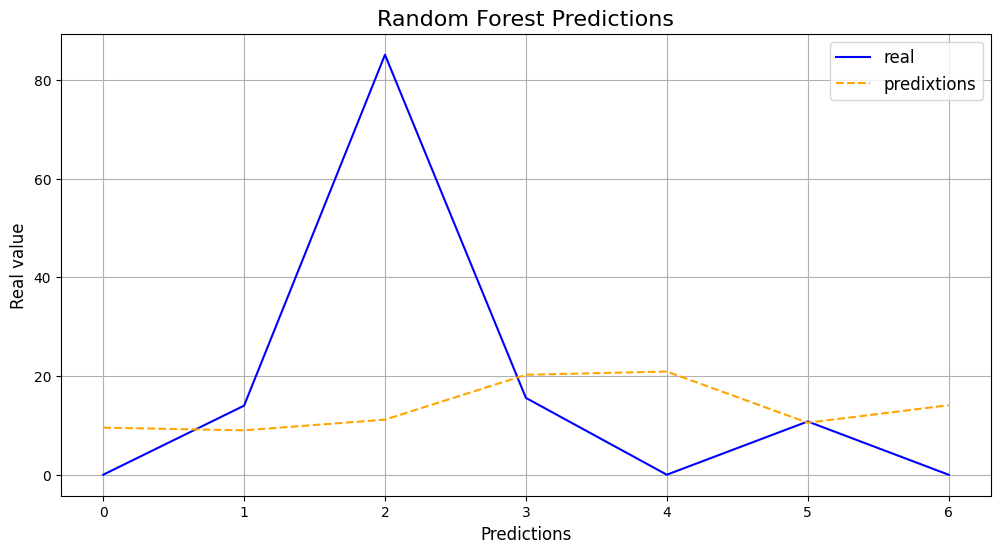

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="real", linestyle="-", color="blue")
plt.plot(test_preds, label="predixtions", linestyle="--", color="orange")
plt.title("Random Forest Predictions", fontsize=16)
plt.xlabel("Predictions", fontsize=12)
plt.ylabel("Real value", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
